In [29]:
import numpy as np
import imageio as io
import scipy
from scipy import stats
import matplotlib.pyplot as plt

from scipy import ndimage

In [ ]:
def 

In [30]:
r_shift = np.right_shift(m_normalized, 8-B)

NameError: name 'm_normalized' is not defined

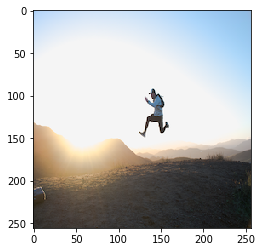

In [149]:
img = io.imread('ImagesForDebugging/wheres_jumpingguy.png')
plt.imshow(img)

In [150]:
teste = np.floor(0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2])

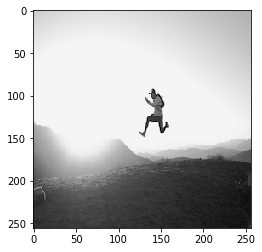

In [151]:
plt.imshow(teste, cmap =  'gray')

In [156]:
teste = teste.astype(np.uint8)
teste1 = np.right_shift(teste, 1)

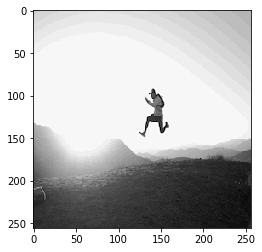

In [35]:
plt.imshow(np.right_shift(teste, 3), cmap =  'gray')

In [36]:
teste2 = np.right_shift(teste, 3)

In [157]:
teste3 = np.histogram(teste1, bins = 2)

In [158]:
teste3

(array([19176, 46360], dtype=int64), array([  0. ,  63.5, 127. ]))

In [162]:
teste3 = np.histogram(teste1, bins = 2)
teste3

(array([0.00460791, 0.01114012]), array([  0. ,  63.5, 127. ]))

In [167]:
teste3[0]/np.sum(teste3[0])

array([0.29260254, 0.70739746])

In [165]:
256*256

65536

In [166]:
46360 + 19176

65536

In [40]:
teste3[0]/np.linalg.norm(teste3[0]))

SyntaxError: invalid syntax (<ipython-input-40-b114b980e19f>, line 1)

In [148]:
teste3[0]/np.sum(teste3[0])

array([0.00083923, 0.00126648, 0.01219177, 0.02548218, 0.03408813,
       0.03585815, 0.04167175, 0.03987122, 0.02989197, 0.0181427 ,
       0.01403809, 0.01113892, 0.00762939, 0.00695801, 0.00712585,
       0.00640869, 0.0072937 , 0.00733948, 0.00772095, 0.00854492,
       0.01286316, 0.01229858, 0.01283264, 0.01870728, 0.02171326,
       0.02513123, 0.03138733, 0.04412842, 0.05786133, 0.06822205,
       0.37135315])

In [147]:
np.histogram(teste2, bins = 31, density = True)[0]

array([0.00083923, 0.00126648, 0.01219177, 0.02548218, 0.03408813,
       0.03585815, 0.04167175, 0.03987122, 0.02989197, 0.0181427 ,
       0.01403809, 0.01113892, 0.00762939, 0.00695801, 0.00712585,
       0.00640869, 0.0072937 , 0.00733948, 0.00772095, 0.00854492,
       0.01286316, 0.01229858, 0.01283264, 0.01870728, 0.02171326,
       0.02513123, 0.03138733, 0.04412842, 0.05786133, 0.06822205,
       0.37135315])

In [43]:
def norm_hist(img, bins, b):
    #bins = np.max(img)
    #print(f'bins in the funciton{bins}')
    result =  np.histogram(img, bins = np.power(2,b), density = True)[0]
    return(result)/np.linalg.norm(result)

In [44]:
def quantization(img, b):

    return np.right_shift(img.astype(np.uint8), b)

In [45]:
def luminance(img):
    return np.floor(0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2])

In [46]:
def intensity_co_ocurrence(img,d_x,d_y, levels):
    srcdata = img.copy()
    ret=np.zeros((levels, levels))
    (height,width) = srcdata.shape
    


    for j in range(height-d_y):
        for i in range(width-d_x):
            rows = srcdata[j][i]
            cols = srcdata[j + d_y][i+d_x]
            ret[rows][cols]+=1.0
    
 
    ret =  ret/(ret.sum())
    
    return ret


In [97]:
def feature_computer(matrix, levels, eps = 0.001):
    con = 0.0
    ent = 0.0
    energy = 0.0
    homo = 0.0
    corr = 0
    
    result = []

    energy = np.sum(np.power(matrix, 2))
    
    for i in range(levels):
        for j in range(levels):
            con += ((i-j)*(i-j)*matrix[i][j])
            ent += matrix[i][j]*np.log(matrix[i][j] + eps)
            energy += np.power((i-j),2)
            homo += (matrix[i][j]/(1+np.absolute(i-j)))
    corr = calc_corr(matrix, levels)
    
    con = (1/(np.power(levels, 2)))*con
    result.append(energy)
    result.append(-ent)
    result.append(con)
    result.append(corr)
    result.append(homo)
    
    result = np.array(result)
    return (result/np.linalg.norm(result))

In [105]:
i=j=np.arange(3)
xv, yv = np.meshgrid(i,j, sparse=False, indexing='xy') 
xv

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [134]:
def calc_corr_t(matrix, size):
    mu_i = calc_mean_x(matrix, size)
    mu_j = calc_mean_y(matrix, size)
    
    std_i = calc_std_x(matrix, mu_i, size)
    std_j = calc_std_y(matrix, mu_j, size)

    if (std_i or std_j) == 0:
        return 0
    # i=j=np.arange(size)
    # xv, yv = np.meshgrid(i,j, sparse=False, indexing='xy') 
    # corr = (np.sum(xv * yv * matrix) - mu_i * mu_j)/(std_i * std_j)
    # return corr 
    
    else:
        corr = 0
        for i in range(size):
            for j in range(size):
                corr += (((i*j)*matrix[i][j]) - (mu_i*mu_i))/(std_i*std_j)
                
        return corr

In [138]:
def feature_computer_t(matrix, levels, eps = 0.001):
    con = 0.0
    ent = 0.0
    energy = 0.0
    homo = 0.0
    corr = 0
    
    result = []
    
    energy = np.sum(np.power(matrix, 2))
    
    ent = np.sum(matrix*np.log(matrix + eps))
    
    i=j=np.arange(levels)
    xv, yv = np.meshgrid(i,j, sparse=False, indexing='xy') 
    con = np.sum(np.power((xv-yv), 2) * matrix)

    # i=j=np.arange(levels)
    # xv, yv = np.meshgrid(i,j, sparse=False, indexing='xy') 
    homo = np.sum(matrix/(1 + np.absolute(xv - yv)))
    
    mu_i = calc_mean_x(matrix, levels)
    mu_j = calc_mean_y(matrix, levels)
    
    std_i = calc_std_x(matrix, mu_i, levels)
    std_j = calc_std_y(matrix, mu_j, levels)
    #  i=j=np.arange(size)
    # xv, yv = np.meshgrid(i,j, sparse=False, indexing='xy') 
    corr = (np.sum((xv * yv) * matrix) - mu_i * mu_j)/(std_i * std_j)
    # return corr 

    
    # for i in range(levels):
    #     for j in range(levels):
            #con += ((i-j)*(i-j)*matrix[i][j])
            #ent += matrix[i][j]*np.log(matrix[i][j] + eps)
            #energy += np.power(matrix[i][j],2)
            #homo += (matrix[i][j]/(1+np.absolute(i-j)))
    #corr = calc_corr_t(matrix, levels)
    
    con = (1/(np.power(levels, 2)))*con
    result.append(energy)
    result.append(-ent)
    result.append(con)
    result.append(corr)
    result.append(homo)
    
    result = np.array(result)
    return result

In [139]:
simple_test = np.array([[1,1,2,2,2], [1,1,1,2,2], [1,1,0,2,2], [0,0,2,0,2], [1,2,2,2,2]])

In [140]:
teste4 = intensity_co_ocurrence(simple_test, 1, 1,3)

In [143]:
feature_computer_t(teste4, 3)

array([ 0.203125  ,  1.67839576,  0.11111111, -0.10479879,  0.75      ])

In [142]:
feature_computer(teste4, 3)

array([ 0.9887668 ,  0.1359932 ,  0.00900286, -0.0084914 ,  0.06076928])

In [136]:
feature_computer_t(teste4, 3)

(-0.10479878948584151, -1.3987430270151093)

In [51]:
np.mean(simple)

NameError: name 'simple' is not defined

In [52]:
np.mean(np.array([[1,1,2], [1,2,2]]), 1)

array([1.33333333, 1.66666667])

In [53]:
mean_test = np.array([[1,1,2], [1,2,2], [1,2,2]])

In [54]:
def calc_mean_x(matrix,  size):
    ui = 0
    temp = 0
    for i in range(size):
        temp += i

        for j in range(size):
            ui += temp*matrix[i][j]
    return ui

In [55]:
def calc_mean_y(matrix,  size):
    uj = 0
    temp = 0
    for j in range(size):
        temp += j
        for i in range(size):
            uj += temp*matrix[i][j]
    return uj

In [56]:
# ui = 0
# temp = 0
# for i in range(3):
#     temp += i
#     print(i)
#     for j in range(3):
#         ui += temp*mean_test[j][i]
# ui

In [57]:
def calc_std_x(matrix, ui, size):
    aux = 0
    std_x = 0
    for i in range(size):
        aux += np.power((i-ui), 2)
        for j in range(size):
            std_x += aux*matrix[i][j]
            
    return std_x

In [58]:
calc_std_x(mean_test, 20, 3)

10830

In [59]:
def calc_std_y(matrix, uj, size):
    aux = 0
    std_y = 0
    for j in range(size):
        aux += np.power((j-uj), 2)
        for i in range(size):
            std_y += aux*matrix[i][j]
            
    return std_y

In [60]:
calc_std_x(mean_test, 23, 3)

14451

In [61]:
def calc_corr(matrix, size):
    mu_i = calc_mean_x(matrix, size)
    mu_j = calc_mean_y(matrix, size)
    
    std_i = calc_std_x(matrix, mu_i, size)
    std_j = calc_std_y(matrix, mu_j, size)

    if (std_i or std_j) == 0:
        return 0
    i=j=np.arange(size)
    xv, yv = np.meshgrid(i,j, sparse=False, indexing='xy') 
    corr = (np.sum(xv * yv * matrix) - mu_i * mu_j)/(std_i * std_j)
    return corr 
    
    # else:
    #     corr = 0
    #     for i in range(size):
    #         for j in range(size):
    #             corr += (((i*j)*matrix[i][j]) - (ui*uj))/(std_x*std_y)
                
    #     return corr

In [62]:
calc_corr(mean_test, 3)

-2.654302660644162e-06

In [63]:
calc_corr(mean_test, 3)

-2.654302660644162e-06

In [64]:
weights_sobel_x =  np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
weights_sobel_y = np.array([[-1,0,1], [-2,0,2], [-1, 0,1]])

In [65]:
ndimage.convolve(simple_test, weights_sobel_x, mode='constant', cval=0.0)

array([[-3, -4, -5, -7, -6],
       [ 0,  2,  4,  2,  0],
       [ 3,  2,  1,  3,  2],
       [-1, -4, -5, -2,  0],
       [ 0,  2,  4,  4,  4]])

In [66]:
def calc_grads(matrix):
    weights_sobel_x =  np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    weights_sobel_y = np.array([[-1,0,1], [-2,0,2], [-1, 0,1]])
    
    grad_x = ndimage.convolve(matrix, weights_sobel_x, mode='constant', cval=0.0)
    grad_y = ndimage.convolve(matrix, weights_sobel_y, mode='constant', cval=0.0)
    
    return grad_x, grad_y

In [67]:
gx, gy = calc_grads(simple_test)

In [68]:
def gradient_magnitude(horizontal_gradient, vertical_gradient):
    horizontal_gradient_square = np.power(horizontal_gradient, 2)
    vertical_gradient_square = np.power(vertical_gradient, 2)
    sum_squares = horizontal_gradient_square + vertical_gradient_square
    grad_magnitude = np.sqrt(sum_squares)
    return grad_magnitude

In [69]:
gradient_magnitude(gx, gy)

array([[4.24264069, 4.47213595, 5.83095189, 7.07106781, 8.48528137],
       [4.        , 2.        , 5.65685425, 4.47213595, 8.        ],
       [4.24264069, 2.        , 3.16227766, 5.83095189, 6.32455532],
       [3.16227766, 5.65685425, 5.09901951, 2.82842712, 4.        ],
       [4.        , 4.47213595, 4.        , 4.        , 5.65685425]])

In [70]:
def gradient_direction(horizontal_gradient, vertical_gradient):
    grad_direction = np.arctan(vertical_gradient/(horizontal_gradient))
    #print(grad_direction)
    grad_direction = grad_direction + (np.pi/2)
    #print(grad_direction)
    grad_direction = np.degrees(grad_direction)
    return grad_direction

In [71]:
gradient_direction(gx, gy)

ipykernel_launcher:2: RuntimeWarning: divide by zero encountered in true_divide


array([[135.        , 116.56505118, 120.96375653,  98.13010235,
         45.        ],
       [  0.        ,  90.        ,  45.        ,  26.56505118,
        180.        ],
       [ 45.        ,  90.        ,  18.43494882,  30.96375653,
        161.56505118],
       [161.56505118, 135.        , 101.30993247, 135.        ,
        180.        ],
       [  0.        ,  26.56505118,  90.        ,  90.        ,
        135.        ]])

In [72]:
def gradient_bins_counts(gradient_dir):
    row, col = gradient_dir.shape 
    result = np.zeros(shape = gradient_dir.shape)
    
    for i in range(row):
        for j in range(col):
            if gradient_dir[i][j] >=0 and gradient_dir[i][j] < 20:
                result[i][j] = 0
            elif gradient_dir[i][j] >=20 and gradient_dir[i][j] < 40:
                 result[i][j] = 1
            elif gradient_dir[i][j] >=40 and gradient_dir[i][j] < 60:
                 result[i][j] = 2
            elif gradient_dir[i][j] >=60 and gradient_dir[i][j] < 80:
                 result[i][j] = 3
            elif gradient_dir[i][j] >=80 and gradient_dir[i][j] < 100:
                 result[i][j] = 4
            elif gradient_dir[i][j] >=100 and gradient_dir[i][j] < 120:
                 result[i][j] = 5
            elif gradient_dir[i][j] >=120 and gradient_dir[i][j] < 140:
                 result[i][j] = 6
            elif gradient_dir[i][j] >=140 and gradient_dir[i][j] < 160:
                 result[i][j] = 7
            else:
                result[i][j] = 8
                
    result = result.astype(int)
    return result
                

In [73]:
def calc_agg_mag(bins_counts, gradient_mags):
    result = np.zeros(9)
    row, col = bins_counts.shape
    
    for i in range(row):
        for j in range(col):
            aux =  bins_counts[i][j]
            result[aux] = result[aux] + gradient_mags[i][j]
            
    return result/np.linalg.norm(result)

In [74]:
test_gra = np.array([[10, 23, 34], [43,12,91], [0,92,1]])
test_mag =np.array([[1, 2, 3], [3,2,1], [1,2,3]])
bins_count = gradient_bins_counts(test_gra)
bins_count

array([[0, 1, 1],
       [2, 0, 4],
       [0, 4, 0]])

In [75]:
calc_agg_mag(bins_count, test_mag)

array([0.72980045, 0.52128604, 0.31277162, 0.        , 0.31277162,
       0.        , 0.        , 0.        , 0.        ])

In [76]:
def get_windows(arr, window_size=64, step=32):
    windows = []
    row = 0
    col = 0
    max_row, max_col = arr.shape
    while row +step < max_row:
        while col + step < max_col:
            windows.append(arr[row:row+window_size, col:col+window_size])
            col += step
        row += step
        col = 0
    
    return windows

In [77]:
get_windows(bins_count, window_size=2, step=1)

[array([[0, 1],
        [2, 0]]),
 array([[1, 1],
        [0, 4]]),
 array([[2, 0],
        [0, 4]]),
 array([[0, 4],
        [4, 0]])]

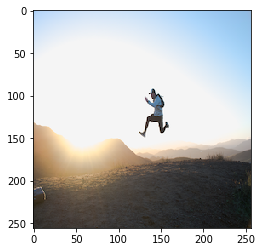

In [78]:
img = io.imread('ImagesForDebugging/wheres_jumpingguy.png')
plt.imshow(img)
teste = np.floor(0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2])

In [79]:

def RMSE(g, R):
    #assert g.shape == R.shape
    
    # Convert the images to int32 allowing negative values to compute RMSE
    return np.sqrt((np.sum((g-R)**2)))


In [80]:
def find_img(path1, path2, quatization_param, window_size = 32, step=16):
    
    img_big = io.imread(path2)
    img_small = io.imread(path1)
    
    img_big_bw = luminance(img_big)
    img_big_bw_quat = quantization(img_big_bw, quatization_param)
    img_big_levels = np.max(img_big_bw_quat)
    
    img_small_bw = luminance(img_small)
    img_small_bw_quat = quantization(img_small_bw, quatization_param)
    img_small_levels = np.max(img_small_bw_quat)
    print(f'image small level {img_small_levels}')
    
    d_c = norm_hist(img_small_bw_quat, bins=img_small_levels, b=quantization_param)
    
    co_ocurrence_m = intensity_co_ocurrence(img_small_bw_quat, 1, 1,img_small_levels+1)
    d_t = feature_computer(co_ocurrence_m, img_small_levels+1)
    
    
    gx, gy = calc_grads(img_small_bw_quat)
    g_mag = gradient_magnitude(gx, gy)
    g_dir = gradient_direction(gx, gy)
    
    bins_count = gradient_bins_counts(g_dir)
    d_g = calc_agg_mag(bins_count, g_mag)
    
    small_concat = np.concatenate((d_c, d_t, d_g))
    
    error = np.inf
    
    row = 0
    col = 0
    max_row, max_col = img_big_bw_quat.shape
    window_i, window_j = 0, 0
    while (row + step) < max_row:
        while (col + step )< max_col:
            window = (img_big_bw_quat[row:row+window_size, col:col+window_size])
#             window_bw_quat = quantization(window, quatization_param)
#             window_levels = np.max(window_bw_quat)
            #print(img_big_levels)
            
            d_c_window = norm_hist(window, bins = img_big_levels, b= quantization_param)
    
            co_ocurrence_m = intensity_co_ocurrence(window, 1, 1,img_big_levels+1)
            d_t_window = feature_computer(co_ocurrence_m, img_big_levels+1)


            gx, gy = calc_grads(window)
            g_mag = gradient_magnitude(gx, gy)
            g_dir = gradient_direction(gx, gy)

            bins_count = gradient_bins_counts(g_dir)
            d_g_window = calc_agg_mag(bins_count, g_mag)
            
            window_concat = np.concatenate((d_c_window, d_t_window, d_g_window))
            
            #print(d_c_window.shape, d_t_window.shape, d_g_window.shape)
            if RMSE(small_concat, window_concat) < error:
                result = (window_i, window_j)
                error = RMSE(small_concat, window_concat)
            
            col += step
            window_j += 1
        window_i += 1
        row += step
        col = 0
        window_j = 0
    
    
    return result

In [84]:
# 'blueumbrella.png'
# 'wheres_blueumbrella.png'

# pumpkin.png
# wheres_pumpkin.png

#pokeball.png
#wheres_pokeball.png

# jumpingguy.png
# wheres_jumpingguy.png

path1 = 'ImagesForDebugging/jumpingguy.png'
path2 = 'ImagesForDebugging/wheres_jumpingguy.png'
quantization_param = 1

path1 ='ImagesForDebugging/blueumbrella.png'
path2 ='ImagesForDebugging/wheres_blueumbrella.png'
quantization_param = 7

In [85]:
find_img(path1, path2, quantization_param)

image small level 1
ipykernel_launcher:2: RuntimeWarning: divide by zero encountered in true_divide
ipykernel_launcher:2: RuntimeWarning: invalid value encountered in true_divide


(1, 3)

In [75]:
sw = get_windows(teste, window_size=32, step=16)

16.0

In [167]:
con.shape

(45,)

In [195]:
np.inf

inf

In [120]:
240/16

15.0

In [117]:
sw[14]

Array([[186., 185., 185., ..., 177., 176., 176.],
       [186., 186., 186., ..., 177., 176., 176.],
       [187., 187., 186., ..., 177., 177., 177.],
       ...,
       [200., 200., 199., ..., 188., 187., 187.],
       [200., 200., 200., ..., 188., 188., 187.],
       [201., 200., 200., ..., 188., 188., 188.]])

In [116]:
teste[0:32, 224:256]

Array([[186., 185., 185., ..., 177., 176., 176.],
       [186., 186., 186., ..., 177., 176., 176.],
       [187., 187., 186., ..., 177., 177., 177.],
       ...,
       [200., 200., 199., ..., 188., 187., 187.],
       [200., 200., 200., ..., 188., 188., 187.],
       [201., 200., 200., ..., 188., 188., 188.]])

In [89]:
255-32

223

In [96]:
16*16

256

In [114]:
16*14

224

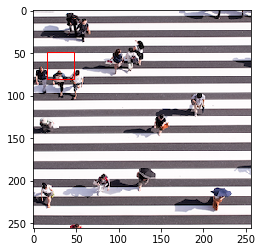

In [285]:
img_big = io.imread(path2)
img_small = io.imread(path1)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig , ax = plt.subplots( )
ax.imshow(img_big)
rect = patches.Rectangle((1 * 16, 3 *16) , 32 , 32 ,linewidth =1, edgecolor='r' , facecolor='none')
ax.add_patch(rect)
plt.show( )